In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets


from matplotlib import pyplot as plt
import seaborn as sns

### Load diabetes data bunch from SciKit and show keys

In [8]:
diabetes = datasets.load_diabetes()

print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


### Show data description
* Helps with feature definitions and meaning

In [9]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Construct a Pandas dataframe of the data and target

In [10]:
df = pd.DataFrame(diabetes['data'])
df.columns = diabetes['feature_names']

df['progression'] = diabetes['target']

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


# Calculate and Display Correlations

## Heatmap
* Default

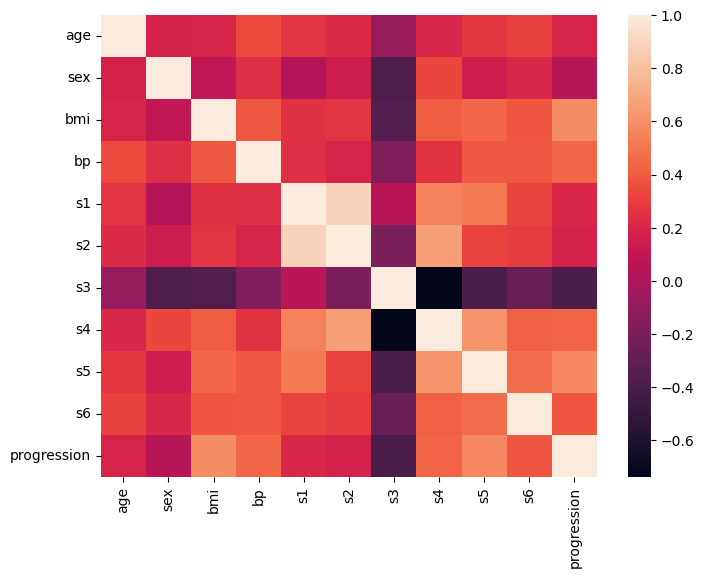

In [11]:
corr = df.corr()

fig = plt.figure(figsize= (8, 6))
sns.heatmap(corr)
plt.show()

#### Include correlation values within cells
* Round values to two decimal places

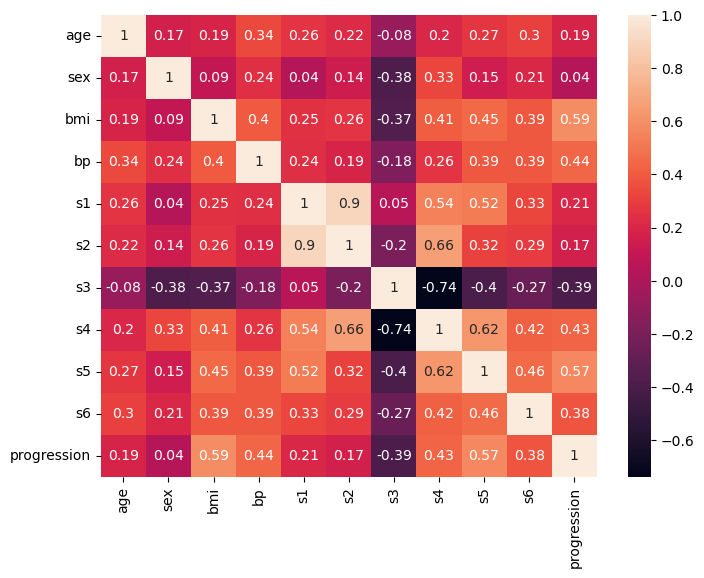

In [12]:
fig = plt.figure(figsize= (8, 6))
sns.heatmap(corr.round(2), annot= True) ## Round correlation values
plt.show()

#### Adjust bounds of colorbar (cbar) 
* Explicitly set bounds of colorbar to those of correlation coefficients

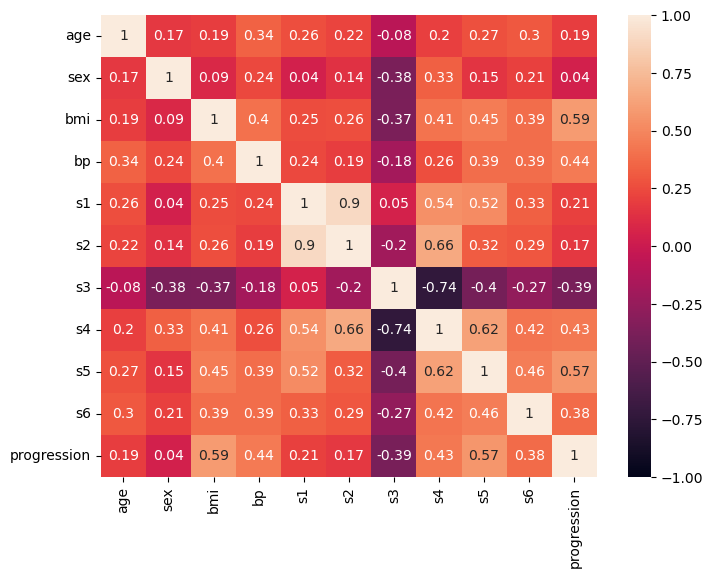

In [13]:
fig = plt.figure(figsize= (8, 6))
sns.heatmap(corr.round(2), annot= True, vmin= -1, vmax= 1)
plt.show()

## Construct a table of correlation values

In [14]:
corr.round(2)
nrows, ncols = corr.shape
expected_entries = len(df.columns)

print(f'Expected Dimensions of Correlation Matrix: {expected_entries} rows by {expected_entries} columns')
print(f'Dimensions of Correlation Matrix: {nrows} rows by {ncols} columns')

Expected Dimensions of Correlation Matrix: 11 rows by 11 columns
Dimensions of Correlation Matrix: 11 rows by 11 columns


#### Convert to dataframe of feature pairs

In [15]:
corr_df = corr.stack().reset_index()
corr_df.columns = ['variable1', 'variable2', 'correlation']
corr_df.head()

,variable1,variable2,correlation
0,age,age,1.000000
1,age,sex,0.173737
2,age,bmi,0.185085
3,age,bp,0.335428
4,age,s1,0.260061


#### Symmetry of correlation matrix includes duplicates
* Corr(A,B) = Corr(B,A)

In [16]:
nrows, ncols = corr_df.shape
print(f'Expected {expected_entries**2} rows')
print(f'Dimensions of reshaped Correlation Matrix: {nrows} rows by {ncols} columns')

Expected 121 rows
Dimensions of reshaped Correlation Matrix: 121 rows by 3 columns


#### Drop duplicates and Corr(A,A)

In [17]:
corr_df = corr_df[corr_df.variable2 > corr_df.variable1]

corr_df.shape[0] == (expected_entries**2 - expected_entries) / 2

True

In [18]:
corr_df = corr_df.loc[corr_df.correlation.abs().sort_values(ascending= False).index]
corr_df.head(n= 10)

,variable1,variable2,correlation
49,s1,s2,0.896663
73,s3,s4,-0.738493
62,s2,s4,0.659817
85,s4,s5,0.617859
32,bmi,progression,0.586450
118,progression,s5,0.565883
51,s1,s4,0.542207
52,s1,s5,0.515503
97,s5,s6,0.464669
30,bmi,s5,0.446157


In [19]:
corr_df[corr_df.correlation.abs() > 0.7]

,variable1,variable2,correlation
49,s1,s2,0.896663
73,s3,s4,-0.738493
